In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


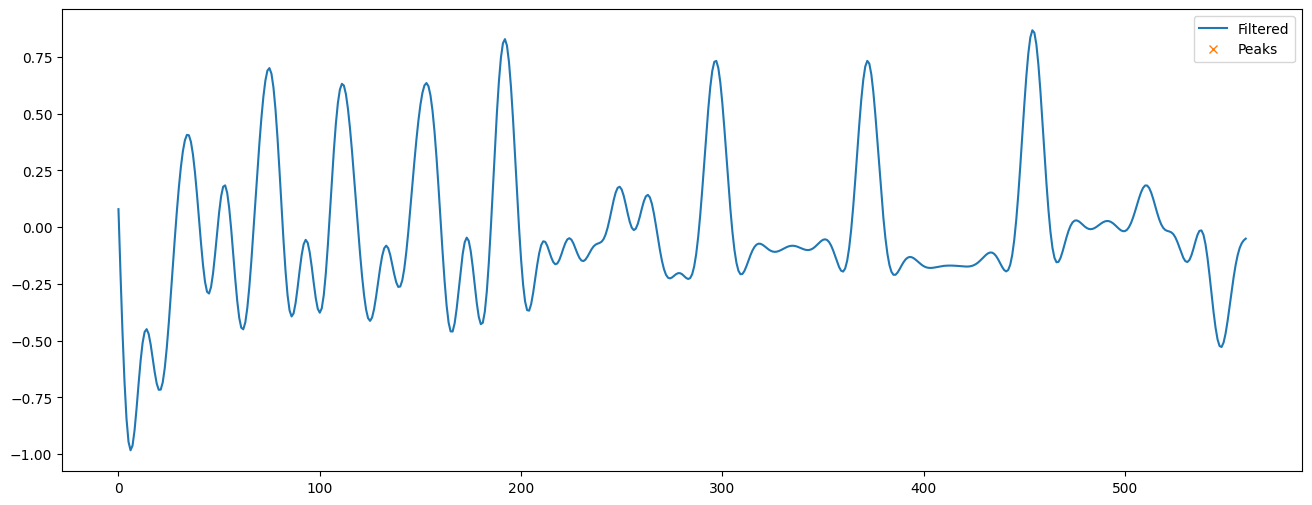

In [10]:
# 데이터셋 로드
train = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/train.csv')
test = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/test.csv')

# 가속도계 데이터 추출
X_train = train.iloc[:, 0:561].values
X_test = test.iloc[:, 0:561].values

# 가속도계 데이터 전처리
X_train = X_train.reshape(X_train.shape[0], 561, 1)
X_test = X_test.reshape(X_test.shape[0], 561, 1)

# 필터링
fs = 50  # 샘플링 주파수
f_low = 0.3  # 저주파 컷오프 주파수
f_high = 3  # 고주파 컷오프 주파수
nyq = 0.5 * fs  # 나이퀴스트 주파수
Wn = [f_low / nyq, f_high / nyq]  # 컷오프 주파수 비율
b, a = signal.butter(4, Wn, 'bandpass')  # 필터 계수 계산

# 피크 검출
X_train_filt_1d = X_train_filt[:, :, 0].reshape(-1)  # 2-D 배열을 1-D 배열로 변환
peaks, _ = signal.find_peaks(X_train_filt_1d, height=2)

# 결과 시각화
plt.figure(figsize=(16, 6))
plt.plot(X_train_filt[0][:, 0], label='Filtered')
plt.plot(peaks, X_train_filt[0][peaks, 0], 'x', label='Peaks')
plt.legend()
plt.show()

